In [ ]:
from keras_preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

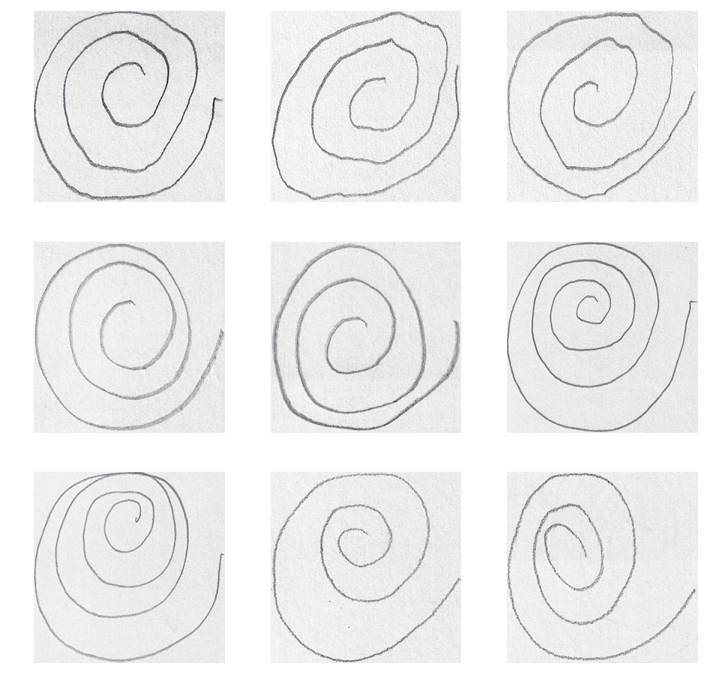

In [ ]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img('C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/spiral/training/healthy/'+os.listdir('C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/spiral/training/healthy/')[i])
    plt.imshow(img)
plt.show()

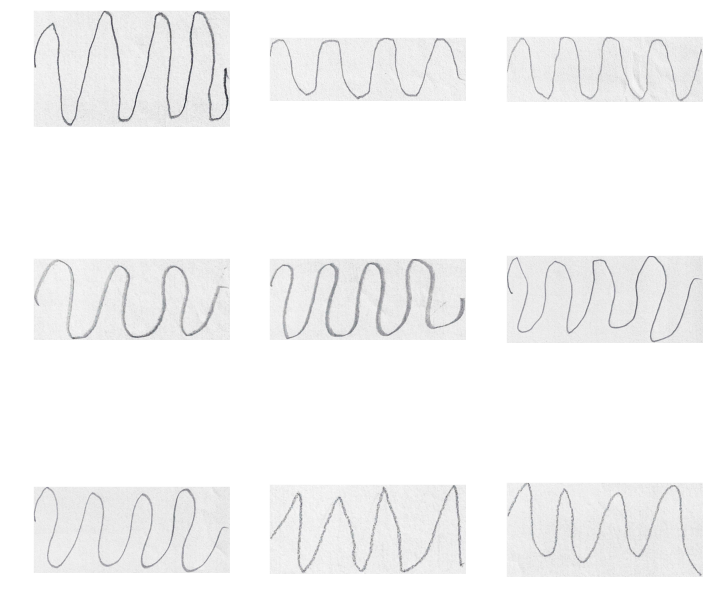

In [ ]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/wave/training/healthy/"+os.listdir("C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/wave/training/healthy/")[i])
    plt.imshow(img)   
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
spiral_train_generator = train_datagen.flow_from_directory('C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
wave_train_generator = train_datagen.flow_from_directory('C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('C:/Users/Hariket Sheth/OneDrive/Documents/HARIKET/6TH SEM/DV/THEORY/drawings/wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 48

classifier.compile(loss='binary_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

C:\Users\Manasvi Maheshwari\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = classifier.fit_generator(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=48,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,
        callbacks=callbacks_list)

C:\Users\Manasvi Maheshwari\AppData\Local\Temp\ipykernel_4528\3598747748.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/48
2/2 [==============================] - 1s 389ms/step - loss: 2.1116 - accuracy: 0.5250 - lr: 0.0010
Epoch 2/48
2/2 [==============================] - 0s 76ms/step - loss: 0.9740 - accuracy: 0.4500 - lr: 0.0010
Epoch 3/48
2/2 [==============================] - 0s 83ms/step - loss: 0.7712 - accuracy: 0.4000 - lr: 0.0010
Epoch 4/48
2/2 [==============================] - 1s 277ms/step - loss: 0.7263 - accuracy: 0.4688 - lr: 0.0010
Epoch 5/48
2/2 [==============================] - 1s 424ms/step - loss: 0.6994 - accuracy: 0.4750 - lr: 0.0010
Epoch 6/48
2/2 [==============================] - 1s 278ms/step - loss: 0.6949 - accuracy: 0.4531 - lr: 0.0010
Epoch 7/48
2/2 [==============================] - 1s 333ms/step - loss: 0.6938 - accuracy: 0.4844 - lr: 0.0010
Epoch 8/48
2/2 [==============================] - 0s 77ms/step - loss: 0.6930 - accuracy: 0.5000 - lr: 0.0010
Epoch 9/48
2/2 [==============================] - 0s 345ms/step - loss: 0.7083 - accuracy: 0.4500 - lr: 0.0010
Epoc

2/2 [==============================] - 0s 76ms/step - loss: 0.6934 - accuracy: 0.4250 - lr: 0.0010
Epoch 19/48
2/2 [==============================] - 1s 270ms/step - loss: 0.6928 - accuracy: 0.5469 - lr: 0.0010
Epoch 20/48
2/2 [==============================] - 0s 310ms/step - loss: 0.6930 - accuracy: 0.5750 - lr: 0.0010
Epoch 21/48
2/2 [==============================] - 0s 330ms/step - loss: 0.6931 - accuracy: 0.4500 - lr: 0.0010
Epoch 22/48
2/2 [==============================] - 1s 295ms/step - loss: 0.6930 - accuracy: 0.5625 - lr: 0.0010
Epoch 23/48
2/2 [==============================] - 0s 318ms/step - loss: 0.6931 - accuracy: 0.5250 - lr: 0.0010
Epoch 24/48
2/2 [==============================] - 0s 86ms/step - loss: 0.6930 - accuracy: 0.5250 - lr: 0.0010
Epoch 25/48
2/2 [==============================] - 0s 312ms/step - loss: 0.6931 - accuracy: 0.5000 - lr: 0.0010
Epoch 26/48
2/2 [==============================] - 0s 85ms/step - loss: 0.6915 - accuracy: 0.6250 - lr: 0.0010
Epoch 2

2/2 [==============================] - 0s 89ms/step - loss: 0.6875 - accuracy: 0.6000 - lr: 0.0010
Epoch 37/48
2/2 [==============================] - 1s 280ms/step - loss: 0.6892 - accuracy: 0.5469 - lr: 0.0010
Epoch 38/48
2/2 [==============================] - 0s 70ms/step - loss: 0.6897 - accuracy: 0.5750 - lr: 0.0010
Epoch 39/48
2/2 [==============================] - 1s 279ms/step - loss: 0.6949 - accuracy: 0.4688 - lr: 0.0010
Epoch 40/48
2/2 [==============================] - 1s 77ms/step - loss: 0.6997 - accuracy: 0.4500 - lr: 0.0010
Epoch 41/48
2/2 [==============================] - 1s 84ms/step - loss: 0.6921 - accuracy: 0.5000 - lr: 0.0010
Epoch 42/48
2/2 [==============================] - 1s 261ms/step - loss: 0.6907 - accuracy: 0.5000 - lr: 0.0010
Epoch 43/48
2/2 [==============================] - 1s 265ms/step - loss: 0.6885 - accuracy: 0.5000 - lr: 0.0010
Epoch 44/48
2/2 [==============================] - 1s 256ms/step - loss: 0.6903 - accuracy: 0.4844 - lr: 0.0010
Epoch 45

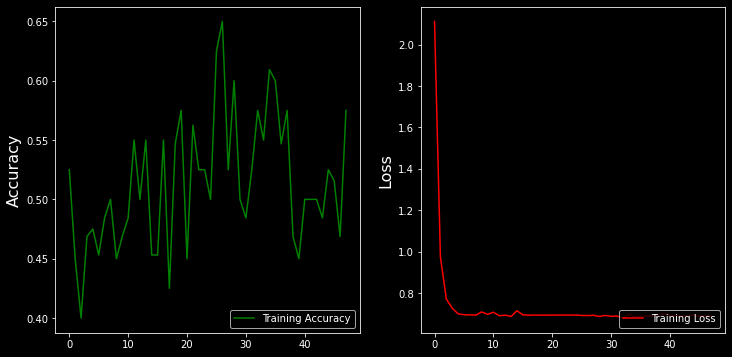

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()